In [5]:
import os
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [6]:
with_mask_files = os.listdir('data/with_mask')

In [7]:
without_mask_files = os.listdir('data/without_mask')

In [8]:
print("Number of with mask images: ",len(with_mask_files))
print("Number of without mask images: ",len(without_mask_files))
print("Total Number of Images: ", len(with_mask_files) + len(without_mask_files))

Number of with mask images:  1915
Number of without mask images:  1918
Total Number of Images:  3833


In [9]:
with_mask_labels = [1] * 1915
without_mask_labels = [0] * 1918

In [10]:
labels = with_mask_labels + without_mask_labels

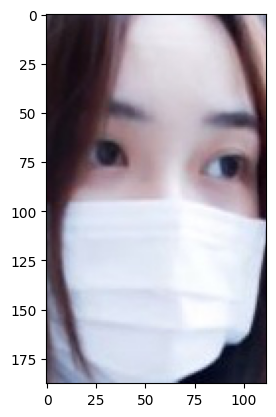

In [11]:
# with mask
img = mpimg.imread('data/with_mask/with_mask (1).jpg')
imgplot = plt.imshow(img)
plt.show()

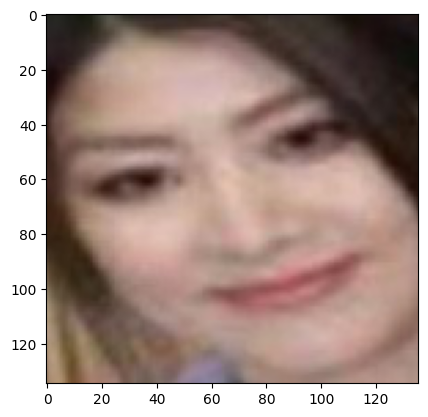

In [12]:
# without mask
img = mpimg.imread('data/without_mask/without_mask (100).jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
# Convert image into numpy array + resize +RGB

In [14]:
with_mask_path = 'data/with_mask/'

data = []
for img_file in with_mask_files:
    image = Image.open(with_mask_path+img_file) # cv2.imread(with_mask_path+img_file)
    
    image = image.resize((128,128)) # cv2.resize(image, (128,128))
    
    image = image.convert('RGB') # cv2.cvtColor(image, COLOR_BGR2RGB)
    
    image = np.array(image)
    data.append(image)

In [15]:
without_mask_path = 'data/without_mask/'

for img_file in without_mask_files:
    image = Image.open(without_mask_path+img_file) # cv2.imread(without_mask_path+img_file)
    
    image = image.resize((128,128)) # cv2.resize(image, (128,128))
    
    image = image.convert('RGB') # cv2.cvtColor(image, COLOR_BGR2RGB)
    
    image = np.array(image)
    data.append(image)

In [16]:
len(data)

3833

In [17]:
type(data)

list

In [18]:
data[0]

array([[[155, 164, 163],
        [155, 164, 163],
        [155, 164, 163],
        ...,
        [ 66,  55,  49],
        [ 65,  54,  49],
        [ 65,  54,  48]],

       [[155, 164, 163],
        [155, 164, 163],
        [155, 164, 163],
        ...,
        [ 75,  64,  58],
        [ 74,  63,  57],
        [ 73,  62,  56]],

       [[153, 162, 161],
        [153, 162, 161],
        [154, 164, 162],
        ...,
        [ 88,  77,  71],
        [ 85,  74,  68],
        [ 83,  72,  67]],

       ...,

       [[155, 157, 154],
        [155, 157, 154],
        [155, 157, 154],
        ...,
        [203, 187, 180],
        [180, 165, 158],
        [166, 151, 144]],

       [[155, 157, 154],
        [155, 157, 154],
        [155, 157, 154],
        ...,
        [198, 183, 176],
        [174, 160, 153],
        [159, 144, 137]],

       [[154, 156, 153],
        [154, 156, 153],
        [155, 157, 154],
        ...,
        [195, 180, 173],
        [170, 156, 149],
        [155, 140, 133]]

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
X = np.array(data)
Y = np.array(labels)

In [21]:
print(Y)

[1 1 1 ... 0 0 0]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [23]:
X_test.shape

(767, 128, 128, 3)

In [25]:
X_train_scale = X_train/255
X_test_scale = X_test/255

In [26]:
X_train_scale.shape

(3066, 128, 128, 3)

In [27]:
# reshaped -> (Number of image, width, height , channel)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
          
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2))) 
          
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = "sigmoid"))

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [110]:
history = model.fit(X_train_scale, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.6932 - loss: 0.7352 - val_acc: 0.9186 - val_loss: 0.2073
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - acc: 0.9230 - loss: 0.2300 - val_acc: 0.9251 - val_loss: 0.1670
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - acc: 0.9332 - loss: 0.2034 - val_acc: 0.9316 - val_loss: 0.2123
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - acc: 0.9464 - loss: 0.1485 - val_acc: 0.9283 - val_loss: 0.1296
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - acc: 0.9649 - loss: 0.1095 - val_acc: 0.9414 - val_loss: 0.1238


In [111]:
loss, accuracy = model.evaluate(X_test_scale, y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9638 - loss: 0.1034


In [112]:
print("Loss is: ",loss)
print("Accuracy is: ",accuracy)

Loss is:  0.10152953863143921
Accuracy is:  0.9647979140281677


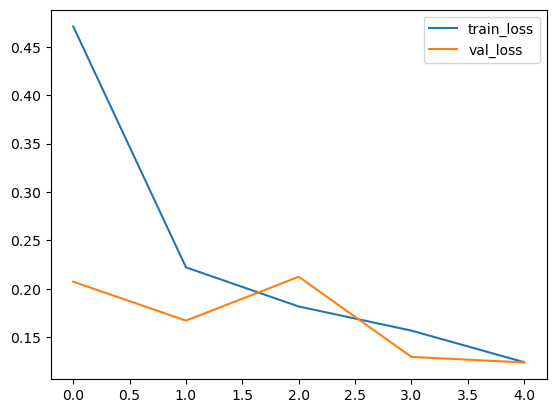

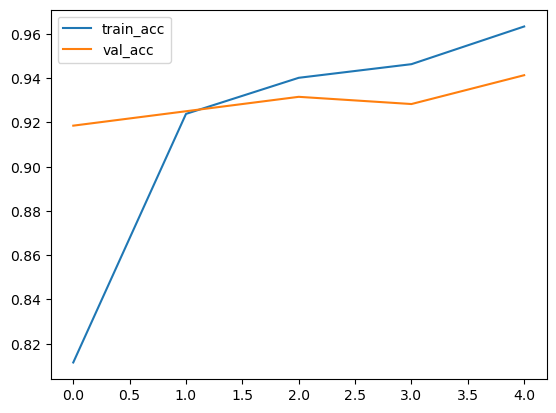

In [113]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label = 'train_acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()

In [114]:
model.save("model.h5")

In [115]:
image_path="data/test3.jpeg"
def preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize if required by model
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img
img=preprocess_image(image_path)
img

array([[[[0.09411765, 0.03921569, 0.03529412],
         [0.08627451, 0.03529412, 0.03137255],
         [0.07843137, 0.03529412, 0.02745098],
         ...,
         [0.24313725, 0.20784314, 0.19215686],
         [0.25490196, 0.22352941, 0.19607843],
         [0.29803922, 0.2627451 , 0.22352941]],

        [[0.09019608, 0.03529412, 0.03137255],
         [0.09019608, 0.03529412, 0.03137255],
         [0.09411765, 0.05098039, 0.04313725],
         ...,
         [0.41176471, 0.36862745, 0.30980392],
         [0.24705882, 0.2       , 0.18823529],
         [0.24313725, 0.20784314, 0.18823529]],

        [[0.07058824, 0.03529412, 0.01568627],
         [0.08627451, 0.05098039, 0.03137255],
         [0.10980392, 0.0745098 , 0.05490196],
         ...,
         [0.66666667, 0.61176471, 0.50588235],
         [0.46666667, 0.43137255, 0.36470588],
         [0.22352941, 0.18823529, 0.17254902]],

        ...,

        [[0.38823529, 0.39215686, 0.36862745],
         [0.38823529, 0.39215686, 0.37254902]

In [116]:
img.shape

(1, 128, 128, 3)

In [117]:
img1=preprocess_image("data/test4.jpeg")
output=model.predict(img1)
if output[0][0]>output[0][1]:
    print("without mask")
else:
    print("with mask")
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
with mask
[[0.0726172  0.82556766]]


In [118]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

def preprocess_image_from_frame(face_img, target_size=(128, 128)):
    face_img = cv2.resize(face_img, target_size)
    face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    face_img = face_img / 255.0
    face_img = np.expand_dims(face_img, axis=0)
    return face_img

def process_video(video_path, output_path="output.mp4"):
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Define video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Or 'XVID'
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5) as face_detection:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = face_detection.process(frame_rgb)

            if results.detections:
                for detection in results.detections:
                    bboxC = detection.location_data.relative_bounding_box
                    ih, iw, _ = frame.shape
                    x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), \
                                 int(bboxC.width * iw), int(bboxC.height * ih)

                    face_img = frame[y:y+h, x:x+w]
                    if face_img.size == 0:
                        continue

                    face_input = preprocess_image_from_frame(face_img)
                    pred = model.predict(face_input)[0]

                    label = "No Mask" if pred[0] > pred[1] else "Mask"
                    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

                    cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
                    cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                                0.9, color, 2)

            # Write the frame to output video
            out.write(frame)

            # Optional: Display
            cv2.imshow("Mask Detection", frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"✅ Video saved as: {output_path}")

In [119]:
process_video("data/input2.mp4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/ad/83/56f760fecdc60de84c529d6c05c9dfc7d972617c6632bd254d5e021e5b16/mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/31/25/32c5e2c919da4faaea9ef5088437ab6e01738c49402e4ec8a6c7b49e30ef/jax-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/f9/d3/da7e18974de849093047251052d64228ab895ec0a2b12390f5a2dc7172d5/jaxlib-0.6.0-cp311-cp311-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy<2 from https://files.pythonhosted.org/packages/3a/d0/edc009c27b406c4f9cbc79274d6e46d634d139075492ad055e3d68445925/numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Obtaining dependency